In [1]:
#!pip install lifelines # Survival 통계분석 패키지 lifelines 설치

In [4]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import pandas as pd

data = pd.DataFrame({
    'time': [7, 5, 3, 50, 38, 17, 7, 2, 4, 6, 8, 10, 14, 18, 22, 28, 40], # 게임에 가입한 기간
    'treatment' : [1,1,1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2], # 신규가입 보너스 지급
    'event' : [True, False, True, False, False, False, True, True, False, True, True, True, True, False, True, True, False] # 결제 유무]
})

In [5]:
data

,time,treatment,event
0,7,1,True
1,5,1,False
2,3,1,True
3,50,2,False
4,38,2,False
5,17,2,False
6,7,1,True
7,2,1,True
8,4,1,False
9,6,1,True


## 0. Survival Analysis 개요
- 생존분석의 목적은 실험군 Case와 대조군 Control 환자 사이에서 유의하게 차이를 보이는 ＇변수＇를 찾기 위함
- 환자가 얼마나 오래 생존하며, Event의 발생 유무를 예측하기 위함
- 생존 변수는 보통 두 변수의 묶음으로 구성; 변수의 성격의 따라 연속형/범주형 구분, 분석에 중요한 요인은 아님, 해석방법의 차이는 있다
 - 1. Event의 유무	(사망, 재발, 게임머니 결제)
 - 2. Event발생 까지의 시간 (생존시간, 수술 후부터 재발까지, 게임 가입후 결제까지)


### 1. Survival data 시각화_KaplanMeierFitter() 활용
- Event가 발생한 시점마다 생존율을 계산
- 관찰 기간 순서대로 자료 정리 후 각 구간별로 관찰대상 수 중 생존자 수의 분율로 구간 생존율 및 누적 생존율을 계산
- 'censored' 표시: 중도절단 -> plot_survival_function(show_censors=True)
 - 생존 분석에서 손실된 데이터를 처리하는 방법이다. 
 - 이상적으로는 표본의 생일과 사망일을 통해 생존 기간을 파악하는 것이 좋지만, 그렇지 못한 경우에 중도절단을 사용한다.

<AxesSubplot:xlabel='time', ylabel='S(t)'>

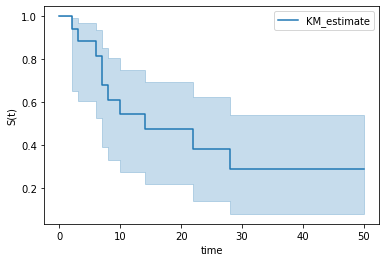

In [8]:
kmf = KaplanMeierFitter()
kmf.fit(data['time'], data['event'])

plot = kmf.plot_survival_function()
plot.set_xlabel('time')
plot.set_ylabel('S(t)')
plot

<AxesSubplot:xlabel='time', ylabel='S(t)'>

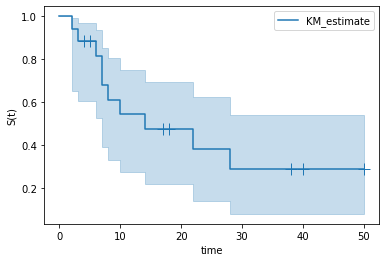

In [9]:
kmf = KaplanMeierFitter()
kmf.fit(data['time'], data['event'])

plot = kmf.plot_survival_function(show_censors = True)
plot.set_xlabel('time')
plot.set_ylabel('S(t)')
plot

<AxesSubplot:xlabel='Time(Months)', ylabel='Survival Rate'>

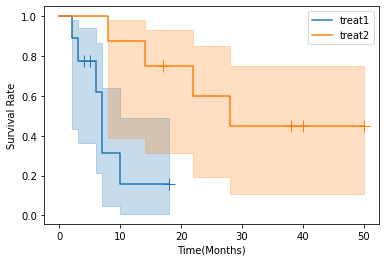

In [13]:
# treat 1, 2를 모두 시각화 해보면,
treat1 = data[data['treatment'] == 1]
treat2 = data[data['treatment'] == 2]

kmf = KaplanMeierFitter()
kmf.fit(treat1['time'], treat1['event'], label = 'treat1')
ax_kmf = kmf.plot(show_censors = True)
kmf.fit(treat2['time'], treat2['event'], label = 'treat2')
ax_kmf = kmf.plot(ax = ax_kmf, show_censors = True)

ax_kmf.set_xlabel("Time(Months)")
ax_kmf.set_ylabel("Survival Rate")
ax_kmf

### 2. logrank_test: 두 집단의 생존율이 같은지 아닌지를 검정

In [16]:
logrank_t = logrank_test(treat1['time'], treat2['time'], treat1['event'], treat2['event'])

In [17]:
logrank_t.p_value

0.007341895570690576

In [18]:
logrank_t.summary

,test_statistic,p,-log2(p)
0,7.187359,0.007342,7.089632


In [22]:
# gender 변수 추가

data = pd.DataFrame({
    'time' : [7, 5, 3, 50, 38, 17, 7, 2, 4, 6, 8, 10, 14, 18, 22, 28, 40], # 게임에 가입한 기간
    'treatment' : [1,1,1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2], # 신규가입 보너스 지급
    'gender' : [1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1],
    'event' : [True, False, True, False, False, False, True, True, False, True, True, True, True, False, True, True, False] # 결제 유무
})

In [23]:
data

,time,treatment,gender,event
0,7,1,1,True
1,5,1,2,False
2,3,1,1,True
3,50,2,1,False
4,38,2,2,False
5,17,2,1,False
6,7,1,2,True
7,2,1,2,True
8,4,1,1,False
9,6,1,2,True


<AxesSubplot:xlabel='Time(Months)', ylabel='Survival Rate'>

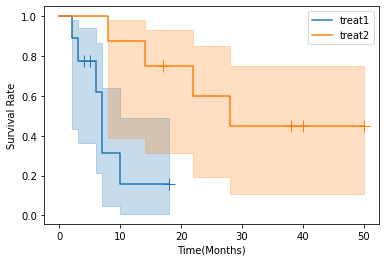

In [27]:
treat1 = data[data['treatment']==1]
treat2 = data[data['treatment']==2]

gender1 = data[data['gender']==1]
gender2 = data[data['gender']==2]

kmf = KaplanMeierFitter()
kmf.fit(treat1['time'], treat1['event'], label = 'treat1')
ax_kmf = kmf.plot(show_censors= True)
kmf.fit(treat2['time'], treat2['event'], label = 'treat2')
ax_kmf1 = kmf.plot(ax = ax_kmf, show_censors = True)

ax_kmf.set_xlabel("Time(Months)")
ax_kmf.set_ylabel("Survival Rate")

ax_kmf1

<AxesSubplot:xlabel='Time(Months)', ylabel='Survival Rate'>

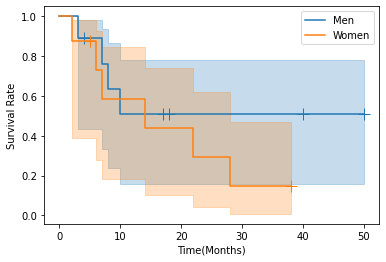

In [29]:
kmf = KaplanMeierFitter()
kmf.fit(gender1['time'], gender1['event'], label = 'Men')
ax_kmf = kmf.plot(show_censors= True)
kmf.fit(gender2['time'], gender2['event'], label = 'Women')
ax_kmf2 = kmf.plot(ax = ax_kmf, show_censors = True)

ax_kmf.set_xlabel("Time(Months)")
ax_kmf.set_ylabel("Survival Rate")

ax_kmf2

### 3. Cox_Regression: Cox Proportional Hazard Ratio Model
- 참고: 공식문서 ('https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html#prediction')
- 생존율에 영향을 미치는 위험인자를 분석
- The exp(coefficients)의 역수: Hazard Ratio
 - p-value가 유의 수준 0.05 보다 작을 때 비교 변수보다 해당 변수가 이벤트 발생 확률이 높아진다.
 - ex. treatment p-value: 0.01, treatment1보다 

In [31]:
from lifelines import CoxPHFitter

In [32]:
data.head(10)

,time,treatment,gender,event
0,7,1,1,True
1,5,1,2,False
2,3,1,1,True
3,50,2,1,False
4,38,2,2,False
5,17,2,1,False
6,7,1,2,True
7,2,1,2,True
8,4,1,1,False
9,6,1,2,True


In [34]:
cph = CoxPHFitter()
cph.fit(data, duration_col='time', event_col='event', formula='treatment+gender')

<lifelines.CoxPHFitter: fitted with 17 total observations, 7 right-censored observations>

In [36]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 17 total observations, 7 right-censored observations>
             duration col = 'time'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 17
number of events observed = 10
   partial log-likelihood = -17.65
         time fit was run = 2022-04-27 06:52:30 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
gender      1.31       3.69       0.77            -0.21             2.82                 0.81                16.73
treatment  -2.64       0.07       0.98            -4.57            -0.72                 0.01                 0.49

            cmp to     z    p   -log2(p)
covariate                               
gender        0.00  1.69 0.09       3.47
treatment     0.00 -2.69 0.01       7.12
---
Concordance = 0.79
Partial AIC = 39.30
log-likelihood ratio test = 9.95 on 2 df
-log2(p) of ll-ratio test = 7.18